In [ ]:
#단순 선형 회귀 
# auto-mpg데이터 셋을 이용한 mpg 예측 모델]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
auto_mpg = files.upload() 

Saving auto-mpg.csv to auto-mpg (1).csv


In [ ]:
raw_df = pd.read_csv(io.BytesIO(auto_mpg['auto-mpg.csv']))

In [ ]:
raw_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df = raw_df.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
#사용하지 않는 변수 제거 car name
df.pop('car name')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
#데이터 전처리 및 EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
 #horsepower가 object 이기 때문에 바꿔줘야합니다
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# '?' 때문에 object
# '?'가 있는 있는 행 제거
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna( subset= [ 'horsepower'], axis =0 ,inplace = True)
df['horsepower']=df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
## 훈련용 데이터와 태스트 데이터 분리
train_df =df.sample(frac = 0.8, random_state = 1234)
test_df = df.drop(train_df.index)

In [ ]:
print(f'훈련용 데이터 개수: {len(train_df)}')
print(f'훈련용 데이터 개수: {len(test_df)}')


훈련용 데이터 개수: 314
훈련용 데이터 개수: 78


In [ ]:
train_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
41,14.0,8,318.0,150.0,4096,13.0,71,1
45,18.0,6,258.0,110.0,2962,13.5,71,1
306,28.8,6,173.0,115.0,2595,11.3,79,1
60,20.0,4,140.0,90.0,2408,19.5,72,1
269,30.9,4,105.0,75.0,2230,14.5,78,1


In [ ]:
test_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
3,16.0,8,304.0,150.0,3433,12.0,70,1
10,15.0,8,383.0,170.0,3563,10.0,70,1
14,24.0,4,113.0,95.0,2372,15.0,70,3
16,18.0,6,199.0,97.0,2774,15.5,70,1
18,27.0,4,97.0,88.0,2130,14.5,70,3


In [ ]:
#feature 선택
df2 = train_df[['mpg','cylinders', 'horsepower', 'weight', 'acceleration']]
df2.head()

,mpg,cylinders,horsepower,weight,acceleration
41,14.0,8,150.0,4096,13.0
45,18.0,6,110.0,2962,13.5
306,28.8,6,115.0,2595,11.3
60,20.0,4,90.0,2408,19.5
269,30.9,4,75.0,2230,14.5


In [ ]:
## 특성 선택을 위한 상관 분석
df2.corr()

,mpg,cylinders,horsepower,weight,acceleration
mpg,1.000000,-0.780114,-0.779562,-0.835515,0.433798
cylinders,-0.780114,1.000000,0.841880,0.902539,-0.512101
horsepower,-0.779562,0.841880,1.000000,0.866845,-0.694403
weight,-0.835515,0.902539,0.866845,1.000000,-0.430596
acceleration,0.433798,-0.512101,-0.694403,-0.430596,1.000000


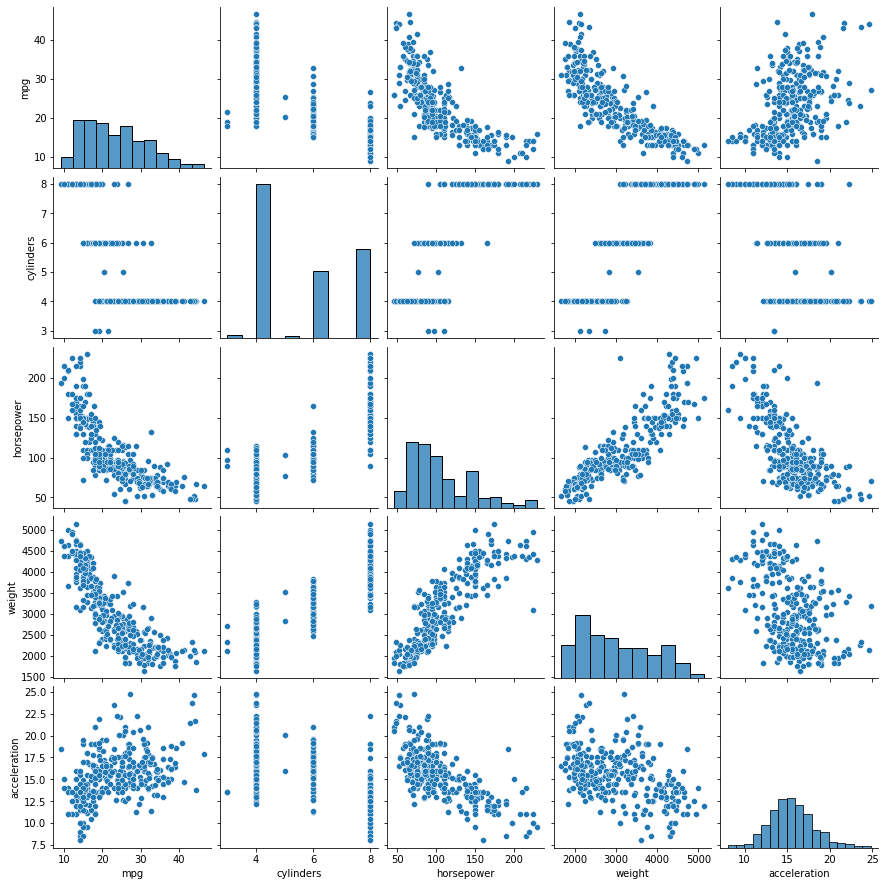

In [ ]:
#상관관계가 높은 weight 로 특성을 설정
sns.pairplot(df2)

In [ ]:
# feature scaling 정규화(단순 회귀때는 상관 없지만 다중 선형 회귀떄는 필요합니다.) 0~1사이로 변환
df_state = df2.describe()
df_state.pop('mpg')
df_state = df_state.T
df_state

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.557325,1.728790,3.0,4.000,5.00,8.00,8.0
horsepower,314.0,106.006369,39.771391,46.0,75.000,95.00,130.00,230.0
weight,314.0,3010.267516,862.889657,1649.0,2223.750,2869.00,3687.75,5140.0
acceleration,314.0,15.469427,2.774592,8.0,13.625,15.45,17.00,24.8


In [ ]:
#정규화 함수 
def normalize(x):
  return (x-df_state['mean'])/ df_state['std']

In [ ]:
#데이터 셋의  x, y 분리
y_train = train_df.